In [155]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import os 
from tqdm import tqdm
import matplotlib.pyplot as plt 
from matplotlib.image import imread


class CONFIG:
    ROOT_DIRECTORY = os.path.join("/", "kaggle", "input", "wlasl-processed")
    JSON_FILE = "WLASL_v0.3.json"
    NSLT_FILE = "nslt_100.json"
    VIDEO_FOLDER = "videos"

# Some statistics and visualization about the dataset

In [2]:
# setup the paths
video_path = os.path.join(CONFIG.ROOT_DIRECTORY, CONFIG.VIDEO_FOLDER)
dataset_description = os.path.join(CONFIG.ROOT_DIRECTORY)

# load the filepaths for videos
video_paths = [os.path.join(video_path, file) for file in os.listdir(video_path)]

# load the dataset config json
config_json = None
with open(os.path.join(CONFIG.ROOT_DIRECTORY, CONFIG.JSON_FILE)) as f:
    config_json = json.load(f)
    
# load the dataset json
dataset_json = None
with open(os.path.join(CONFIG.ROOT_DIRECTORY, CONFIG.NSLT_FILE)) as f:
    dataset_json = json.load(f)

print(f"the dataset consists of {len(dataset_json.keys())} videos")
print(f"there are {len(video_paths)} videos in total")

the dataset consists of 2038 videos
there are 11980 videos in total


In [35]:
video_ids = []
actions = []
action_lengths = []
prop1, prop2, prop3 = [], [], []

for el in tqdm(dataset_json.items()):
    video_id, properties = el[0], el[1]
    video_ids.append(video_id)
    subset = properties["subset"]
    _actions = properties["action"]
    action_lengths.append(len(_actions))
    for act in _actions:
        actions.append(act)

    if len(_actions) == 3:
        prop1.append(_actions[0])
        prop2.append(_actions[1])
        prop3.append(_actions[2])
        
actions = np.array(actions)
action_lengths = np.array(action_lengths)
prop1 = np.array(prop1)
prop2 = np.array(prop2)
prop3 = np.array(prop3)

100%|██████████| 2038/2038 [00:00<00:00, 307084.05it/s]


number of unique actions : 241
number of unique action length : 1
number of unique prop1 : 100
number of unique prop2 : 55
number of unique prop3 : 174


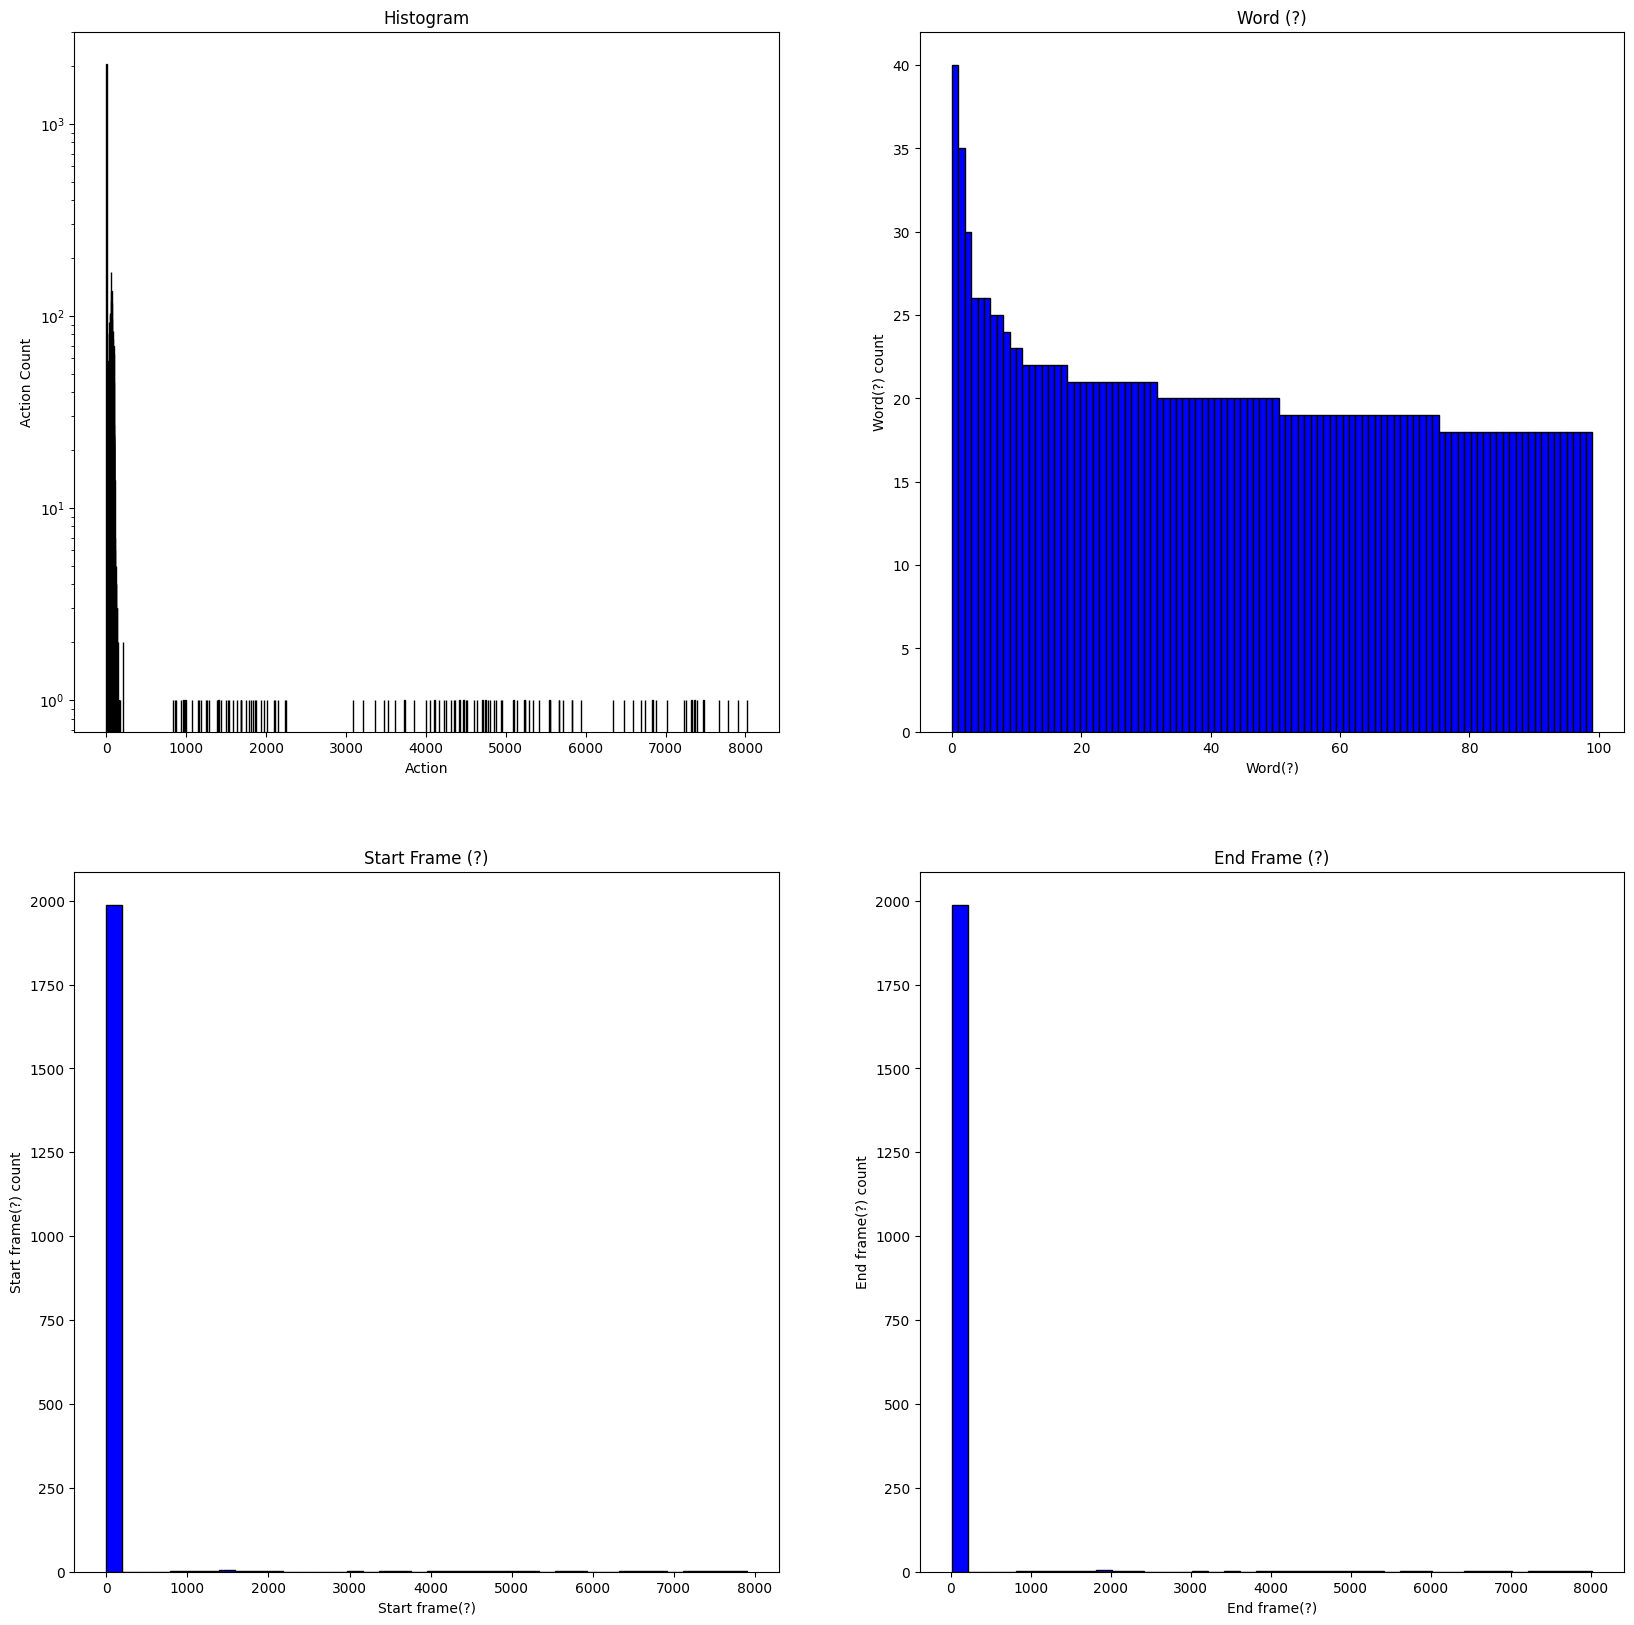

In [32]:
print(f"number of unique actions : {len(np.unique(actions))}")
print(f"number of unique action length : {len(np.unique(action_lengths))}")
print(f"number of unique prop1 : {len(np.unique(prop1))}")
print(f"number of unique prop2 : {len(np.unique(prop2))}")
print(f"number of unique prop3 : {len(np.unique(prop3))}")

plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
# Plot histogram
plt.hist(actions, bins=len(actions), edgecolor='black', color='blue')
# Add labels and title
plt.xlabel('Action')
plt.ylabel('Action Count')
plt.title('Histogram')
plt.yscale("log")

plt.subplot(2, 2, 2)
# Plot histogram
plt.hist(prop1, bins=100, edgecolor='black', color='blue')
# Add labels and title
plt.xlabel('Word(?)')
plt.ylabel('Word(?) count')
plt.title('Word (?)')

plt.subplot(2, 2, 3)
# Plot histogram
plt.hist(prop2, bins=40, edgecolor='black', color='blue')
# Add labels and title
plt.xlabel('Start frame(?)')
plt.ylabel('Start frame(?) count')
plt.title('Start Frame (?)')

plt.subplot(2, 2, 4)
# Plot histogram
plt.hist(prop3, bins=40, edgecolor='black', color='blue')
# Add labels and title
plt.xlabel('End frame(?)')
plt.ylabel('End frame(?) count')
plt.title('End Frame (?)')

# Show plot
plt.show()

In [ ]:
# returns True : strong indication that the first value is word, second is frame start, third is frame end
np.all(prop2 < prop3)

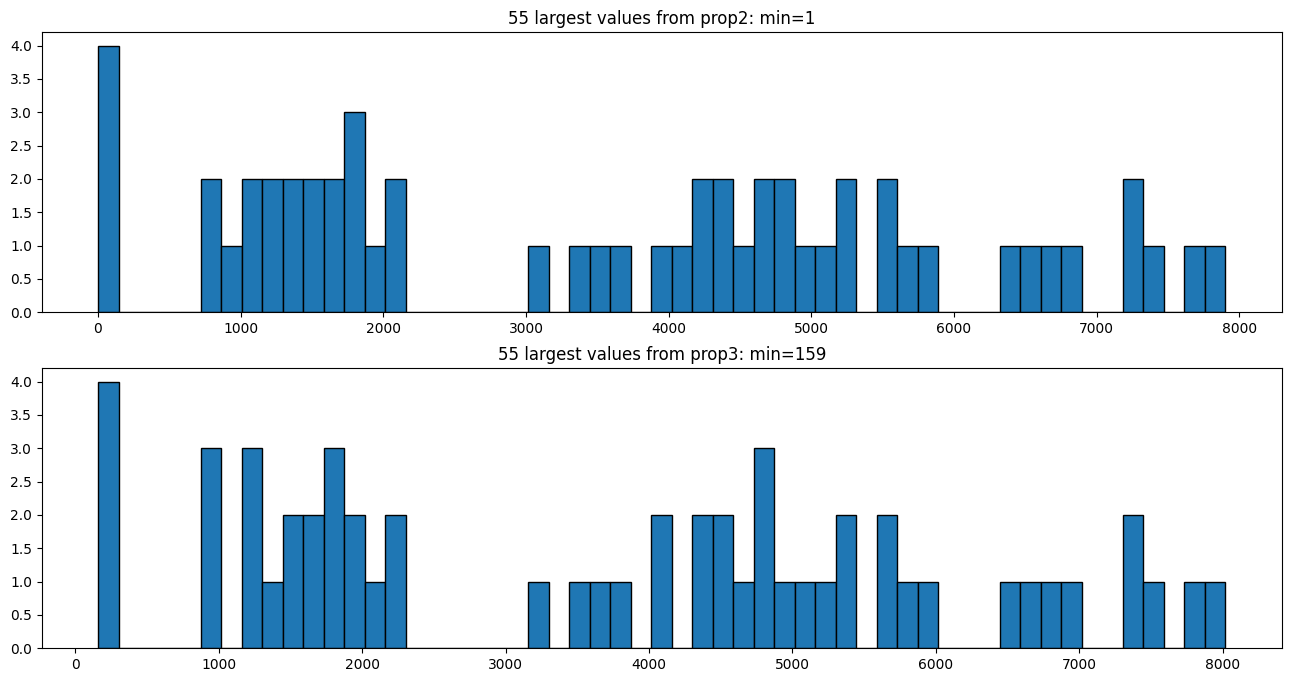

In [66]:
# the dataset contains few points, that their start and end frame is extremely high. 
# they should most likely be removed, as this would indicate very long video
offset = 55

subset_prop2 = sorted(prop2)[-offset:]
subset_prop3 = sorted(prop3)[-offset:]

subset_prop2_min = subset_prop2[0]
subset_prop3_min = subset_prop3[0]

plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plt.title(f"{offset} largest values from prop2: min={subset_prop2_min}")
plt.hist(subset_prop2, bins=offset, edgecolor="black")

plt.subplot(2, 1, 2)
plt.title(f"{offset} largest values from prop3: min={subset_prop3_min}")
plt.hist(subset_prop3, bins=offset, edgecolor="black")


plt.show()

values left 1981 from 2038 [ 97.203 % of data]
words_filtered unique : 100
start_frames_filtered unique : 1
end_frames_filtered unique : 120


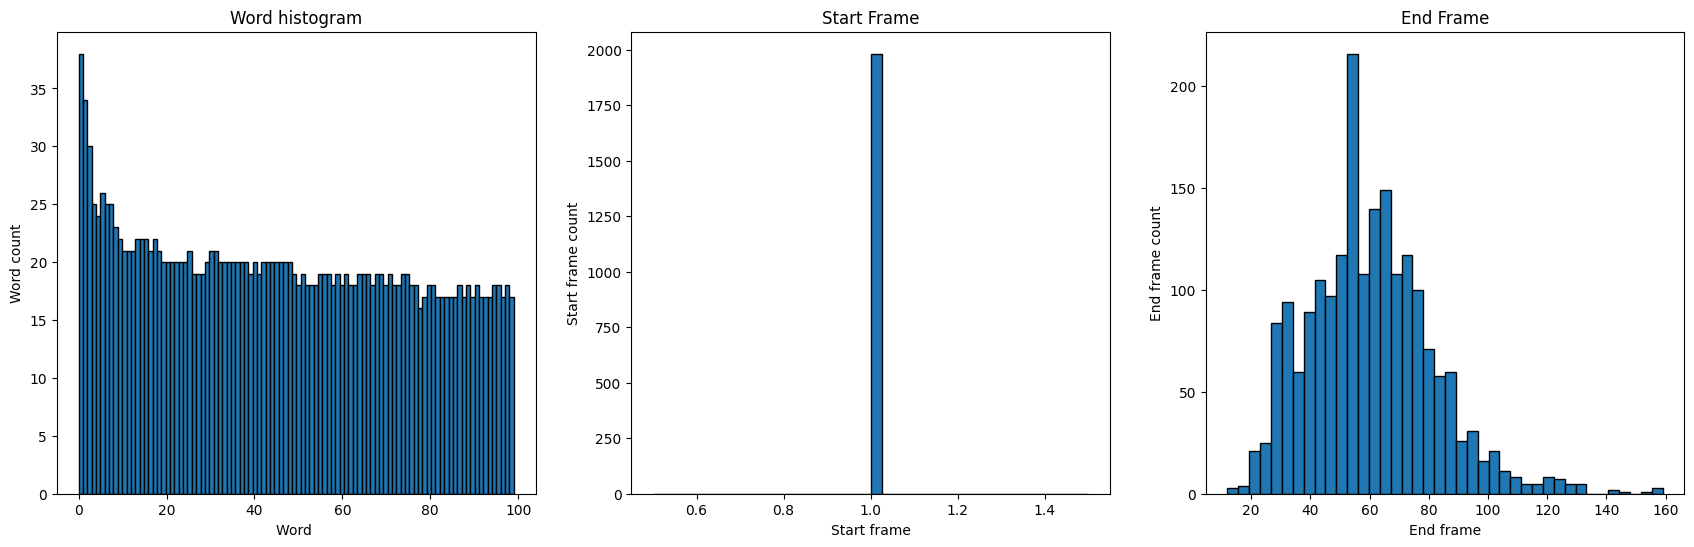

In [93]:
# now let's remove the values, that has extremely high 

# filter by the subset2 
mask = np.logical_and(prop2 <= subset_prop2_min, prop3 <= subset_prop3_min)
print(f"values left {np.sum(mask)} from {len(prop2)} [ {round( 100 * np.sum(mask) / len(prop2) , 3)} % of data]")

words_filtered = prop1[mask]
start_frames_filtered = prop2[mask]
end_frames_filtered = prop3[mask]
video_ids_filtered = np.array(video_ids)[mask]

print(f"words_filtered unique : {len(np.unique(words_filtered))}")
print(f"start_frames_filtered unique : {len(np.unique(start_frames_filtered))}")
print(f"end_frames_filtered unique : {len(np.unique(end_frames_filtered))}")

plt.figure(figsize=(21,6))
plt.subplot(1, 3, 1)
# Plot histogram
plt.hist(words_filtered, bins=100, edgecolor='black')
# Add labels and title
plt.xlabel('Word ')
plt.ylabel('Word count')
plt.title('Word histogram')

plt.subplot(1, 3, 2)
# Plot histogram
plt.hist(start_frames_filtered, bins=40, edgecolor='black')
# Add labels and title
plt.xlabel('Start frame')
plt.ylabel('Start frame count')
plt.title('Start Frame')

plt.subplot(1, 3, 3)
# Plot histogram
plt.hist(end_frames_filtered, bins=40, edgecolor='black')
# Add labels and title
plt.xlabel('End frame')
plt.ylabel('End frame count')
plt.title('End Frame')

# Show plot
plt.show()

## Make sure that the videos exists

In [125]:
from typing import List

#words_filtered = prop1[mask]
#start_frames_filtered = prop2[mask]
#end_frames_filtered = prop3[mask]
#video_ids_filtered = np.array(video_ids)[mask]

def process_video_from_path(path : str) -> List[np.ndarray]:
    if not os.path.exists(path):
        return None
    
    return []
    #print(os.path.exists(path))

found_words = []
found_starts = []
found_ends = []
found_ids = []
    
cnt = 0
not_found = []
for i in tqdm(range(len(video_ids_filtered))):
    pth = os.path.join(video_path, video_ids_filtered[i] + ".mp4")
    res = process_video_from_path(pth)
    if res is not None:
        cnt += 1
        found_ids.append(pth)
        found_words.append(words_filtered[i])
        found_starts.append(start_frames_filtered[i])
        found_ends.append(end_frames_filtered[i])
    else:
        not_found.append(pth)
        
found_words = np.array(found_words)
found_starts = np.array(found_starts)
found_ends = np.array(found_ends)
found_ids = np.array(found_ids)

print(f"{len(found_ids)}/{len(video_ids)}")

100%|██████████| 1981/1981 [00:00<00:00, 67882.75it/s]

1011/2038


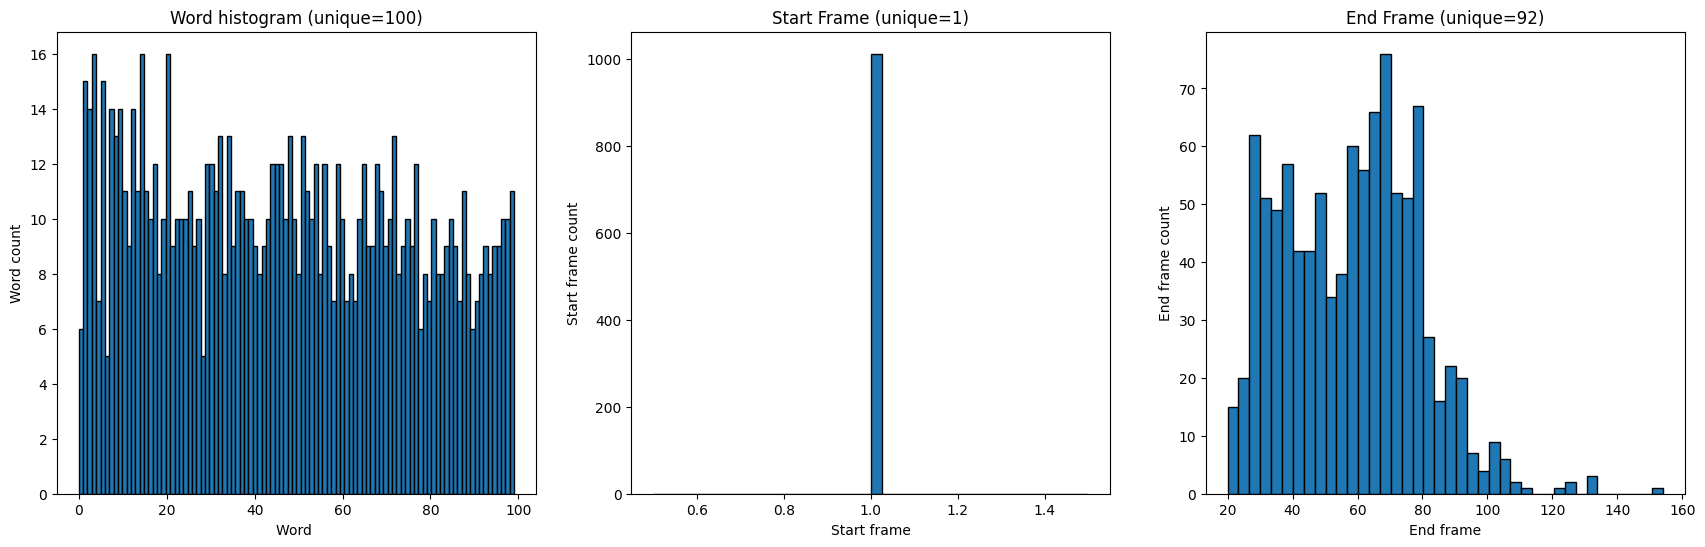

In [127]:
plt.figure(figsize=(21,6))
plt.subplot(1, 3, 1)
# Plot histogram
plt.hist(found_words, bins=100, edgecolor='black')
# Add labels and title
plt.xlabel('Word ')
plt.ylabel('Word count')
plt.title(f'Word histogram (unique={len(np.unique(found_words))})')

plt.subplot(1, 3, 2)
# Plot histogram
plt.hist(found_starts, bins=40, edgecolor='black')
# Add labels and title
plt.xlabel('Start frame')
plt.ylabel('Start frame count')
plt.title(f'Start Frame (unique={len(np.unique(found_starts))})')

plt.subplot(1, 3, 3)
# Plot histogram
plt.hist(found_ends, bins=40, edgecolor='black')
# Add labels and title
plt.xlabel('End frame')
plt.ylabel('End frame count')
plt.title(f'End Frame (unique={len(np.unique(found_ends))})')

# Show plot
plt.show()

## See some of the videos

In [142]:
import cv2

def get_video(video_path : str) -> List[np.ndarray]:
    if not os.path.exists(video_path):
        return None
    
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        return None

    frames = []

    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            frame_array = np.array(frame)
            frames.append(cv2.cvtColor(frame_array, cv2.COLOR_BGR2RGB))
        else:
            break

    cap.release()

    return np.array(frames)



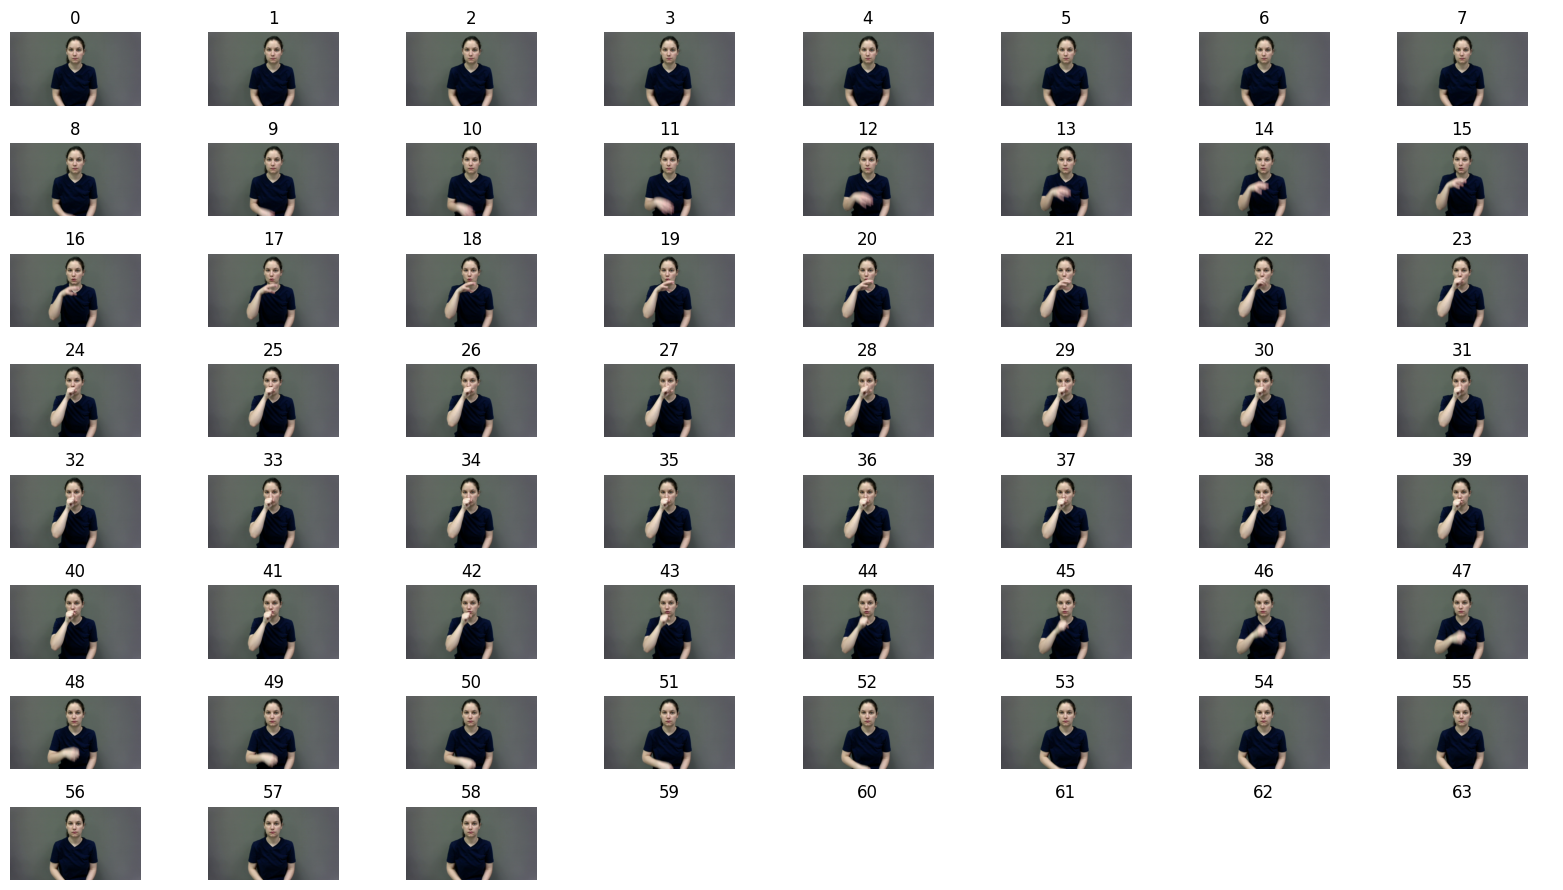

In [156]:
# load the frame 
frames = get_video(found_ids[0])

# calculate the grid
image_cnt = frames.shape[0]
rounded_cnt = ceil(sqrt(image_cnt))

# calculate the width/height ratio
ratio = frames.shape[1] / frames.shape[2]

# create grid of arrays
fig, axs = plt.subplots(rounded_cnt, rounded_cnt, figsize=( rounded_cnt*2, ratio * rounded_cnt*2))
axs_flat = axs.flatten()

# Loop through images and display each
for i in range(rounded_cnt * rounded_cnt):
    if i < len(frames):
        axs_flat[i].imshow(frames[i])
    axs_flat[i].axis('off')  # Turn off axis
    axs_flat[i].set_title(i)

plt.tight_layout()
plt.show()

# Create PyTorch dataset

In [173]:
import os 
import torch
import random
import numpy as np
from tqdm import tqdm
from typing import List

import torch
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
        
class SignRecognitionDataset(Dataset):

    def __init__(self, max_start : int, max_end) -> None:
        # setup the paths
        video_path = os.path.join(CONFIG.ROOT_DIRECTORY, CONFIG.VIDEO_FOLDER)
        dataset_description = os.path.join(CONFIG.ROOT_DIRECTORY)

        # load the filepaths for videos
        self.video_paths = [os.path.join(video_path, file) for file in os.listdir(video_path)]

        # load the dataset config json
        self.config_json = None
        with open(os.path.join(CONFIG.ROOT_DIRECTORY, CONFIG.JSON_FILE)) as f:
            self.config_json = json.load(f)

        # load the dataset json
        self.dataset_json = None
        with open(os.path.join(CONFIG.ROOT_DIRECTORY, CONFIG.NSLT_FILE)) as f:
            self.dataset_json = json.load(f)
        
        self.videos_paths = []
        self.paths_not_found = []
        self.labels = []
        self.start_frames = []
        self.end_frames = []
        

        for el in tqdm(dataset_json.items()):
            video_id, properties = el[0], el[1]
            path = os.path.join(video_path, video_id + ".mp4")
            
            if not os.path.exists(path):
                self.paths_not_found.append(path)
                continue

            subset = properties["subset"]
            label, start, end = properties["action"]
            
            if start > max_start:
                continue
                
            if end > max_end:
                continue
            
            self.videos_paths.append(path)
            self.labels.append(label)
            self.start_frames.append(start)
            self.end_frames.append(end)
        
        self.cache_data()
        
    def cache_data(self):
        pass
    

    def preprocess_trajectory(self, traj : List[np.ndarray]):
        return traj
    
    def __len__(self):
        return len(self.videos_paths)

    def __getitem__(self, idx):
        path, label = self.videos_paths[idx], self.labels[idx]
        trajectory = SignRecognitionDataset.get_video(path)
        
        return self.preprocess_trajectory(trajectory), label
        
        
    @staticmethod
    def get_video(video_path : str) -> List[np.ndarray]:

        if not os.path.exists(video_path):
            return None

        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            return None

        frames = []
        while cap.isOpened():
            ret, frame = cap.read()
            if ret:
                frame_array = np.array(frame)
                frames.append(cv2.cvtColor(frame_array, cv2.COLOR_BGR2RGB))
            else:
                break

        cap.release()
        return np.array(frames)


    
ds = SignRecognitionDataset(max_start=1, max_end=150)
print(f"after filtering : size of dataset={len(ds)}")

100%|██████████| 2038/2038 [00:00<00:00, 95047.39it/s]

after filtering : size of dataset=1010


In [183]:
framelengths, widths, heights, sizes = [], [], [], []
wh_pairs = []

for x,y in tqdm(ds):
    sh = x.shape
    framelengths.append(sh[0])
    widths.append(sh[1])
    heights.append(sh[2])
    wh_pairs.append((sh[1], sh[2]))
    sizes.append(x.nbytes)

100%|██████████| 1010/1010 [03:39<00:00,  4.60it/s]


In [186]:
from collections import Counter

Counter(wh_pairs)

Counter({(192, 288): 225,
         (1080, 1920): 170,
         (480, 640): 135,
         (400, 720): 114,
         (370, 656): 103,
         (720, 1280): 95,
         (240, 320): 91,
         (414, 736): 54,
         (480, 854): 13,
         (180, 320): 5,
         (360, 640): 5})

In [179]:
def Format(x, rnd_digits=3):
    prefix = ""
    
    if x >= 1024 and x < 1024**2:
        prefix = "K"
        x /= 1024
    elif x >= 1024**2 and x < 1024**3:
        prefix = "M"
        x /= 1024**2
    elif x >= 1024**3:
        prefix = "G"
        x /= 1024**3
    
    return f"{round(x,rnd_digits)}{prefix}B"

print(f"If cached, the total size would be : {Format(sum(sizes))}")

If cached, the total size would be : 86.975GB


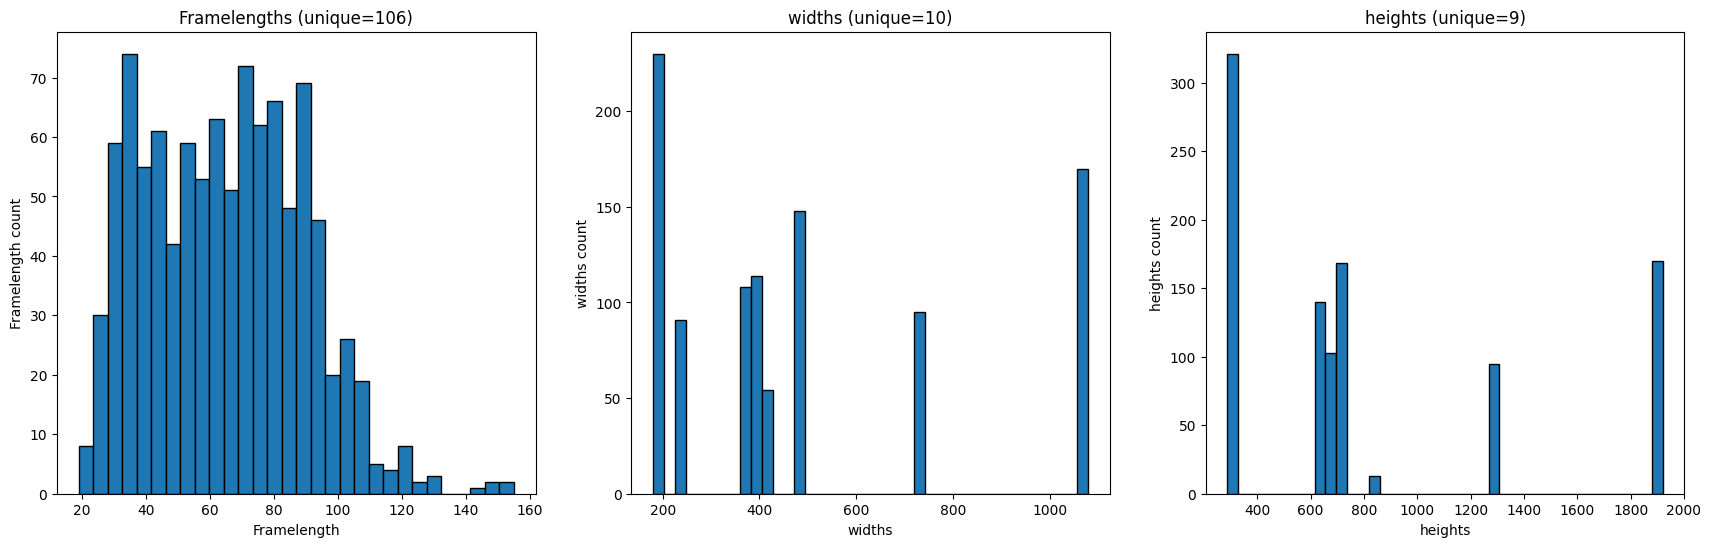

In [182]:
plt.figure(figsize=(21,6))
plt.subplot(1, 3, 1)
# Plot histogram
plt.hist(framelengths, bins=30, edgecolor='black')
# Add labels and title
plt.xlabel('Framelength')
plt.ylabel('Framelength count')
plt.title(f'Framelengths (unique={len(np.unique(framelengths))})')

plt.subplot(1, 3, 2)
# Plot histogram
plt.hist(widths, bins=40, edgecolor='black')
# Add labels and title
plt.xlabel('widths')
plt.ylabel('widths count')
plt.title(f'widths (unique={len(np.unique(widths))})')

plt.subplot(1, 3, 3)
# Plot histogram
plt.hist(heights, bins=40, edgecolor='black')
# Add labels and title
plt.xlabel('heights')
plt.ylabel('heights count')
plt.title(f'heights (unique={len(np.unique(heights))})')

# Show plot
plt.show()

In [201]:
desired_shape = (240, 240)

new_ds = []
sizes_after_rescaling = []
for x,y in tqdm(ds):
    
    refined = []
    for img in x: 
        y, x, c = img.shape
        cropped = img[:, (x // 2 - y//2) : (x // 2 + y//2), :]
        scaled = cv2.resize(cropped, desired_shape)
        refined.append(scaled)

    new_ds.append(refined)
    sizes_after_rescaling.append((np.array(refined)).nbytes)

100%|██████████| 1010/1010 [03:59<00:00,  4.22it/s]


In [196]:
print(f"after rescaling, the total size would be : {Format(sum(sizes_after_rescaling))}")
np.array(refined).shape

after rescaling, the total size would be : 10.518GB


(79, 240, 240, 3)

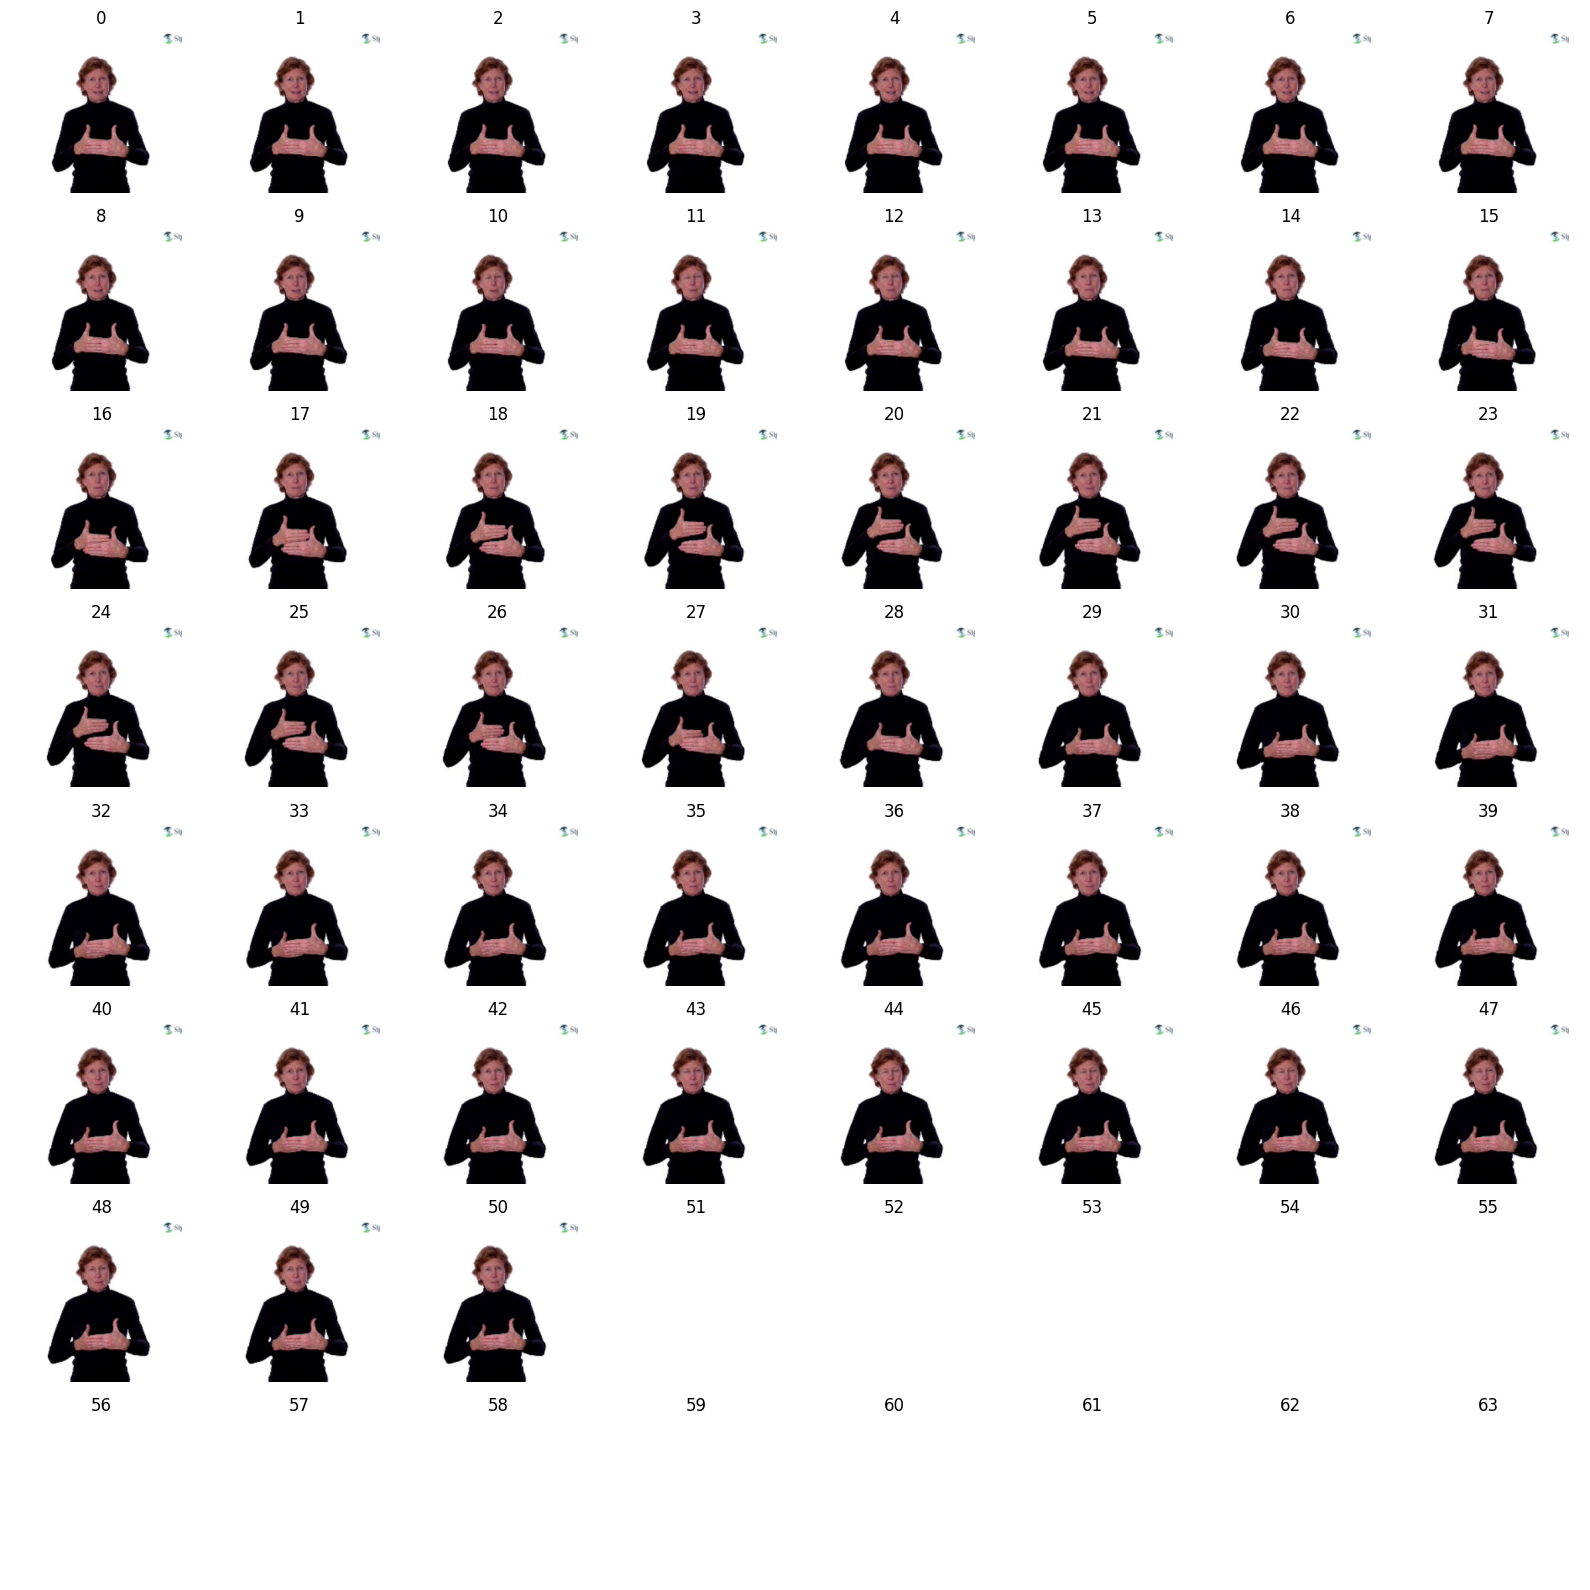

In [205]:
# load the frame 
from math import ceil, sqrt
frames = np.array(new_ds[47])

# calculate the grid
image_cnt = frames.shape[0]
rounded_cnt = ceil(sqrt(image_cnt))

# calculate the width/height ratio
ratio = frames.shape[1] / frames.shape[2]

# create grid of arrays
fig, axs = plt.subplots(rounded_cnt, rounded_cnt, figsize=( rounded_cnt*2, ratio * rounded_cnt*2))
axs_flat = axs.flatten()

# Loop through images and display each
for i in range(rounded_cnt * rounded_cnt):
    if i < len(frames):
        axs_flat[i].imshow(frames[i])
    axs_flat[i].axis('off')  # Turn off axis
    axs_flat[i].set_title(i)

plt.tight_layout()
plt.savefig('your_plot_filename.png', bbox_inches='tight')
plt.show()